# Linear Regression



In [1]:
# Load standard libraries

%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext watermark
%watermark -v -m -p numpy,pandas,skmultilearn -g

import os
import sys
import re
import yaml
import dateutil
import watermark
from tqdm import tqdm
from math import floor
from pprint import pprint as pp
from ast import literal_eval

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

CPython 3.7.3
IPython 7.8.0

numpy 1.17.4
pandas 0.25.1
skmultilearn not installed

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.0.0
machine    : x86_64
processor  : i386
CPU cores  : 16
interpreter: 64bit
Git hash   : 6eb4ffe2ff796760a2dde2725bc4c6351a98cb72


### Intro

Linear regression is perhaps one of the most well known and understood algorithms in statistics and machine learning.

Why this algorithm is still relevant? Machine learning and more specifically predictive modeling is concerned with **minimizing the error** of a model or making the most accurate predictions possible.

To that end linear regression was developed in the field of statistics and machine learning borrowed all the knowledge to apply it in the huge datasets.

Linear regression is a linear model, which basically assumes a linear relationship between the input variables (x) and the output variable o label (y) and y can be calculated from a linear combination of the input variables (x).

The name can change depending on the number of input variables:

- For single input variable (x) the method is referred to as simple linear regression.
- For multiple input variables the method is usually refered as multiple linear regression.

As techniques for the optimization of linear requession equations, the most common technique is **Ordinary Least Squares** and model is tipically called **Ordinary Least Squares Linear Regression** or just **Least Squares Regression**.


















1. Simple Linear Regression
With simple linear regression when we have a single input, we can use statistics to estimate the coefficients.

This requires that you calculate statistical properties from the data such as means, standard deviations, correlations and covariance. All of the data must be available to traverse and calculate statistics.

This is fun as an exercise in excel, but not really useful in practice.

2. Ordinary Least Squares
When we have more than one input we can use Ordinary Least Squares to estimate the values of the coefficients.

The Ordinary Least Squares procedure seeks to minimize the sum of the squared residuals. This means that given a regression line through the data we calculate the distance from each data point to the regression line, square it, and sum all of the squared errors together. This is the quantity that ordinary least squares seeks to minimize.

This approach treats the data as a matrix and uses linear algebra operations to estimate the optimal values for the coefficients. It means that all of the data must be available and you must have enough memory to fit the data and perform matrix operations.

It is unusual to implement the Ordinary Least Squares procedure yourself unless as an exercise in linear algebra. It is more likely that you will call a procedure in a linear algebra library. This procedure is very fast to calculate.

3. Gradient Descent
When there are one or more inputs you can use a process of optimizing the values of the coefficients by iteratively minimizing the error of the model on your training data.

This operation is called Gradient Descent and works by starting with random values for each coefficient. The sum of the squared errors are calculated for each pair of input and output values. A learning rate is used as a scale factor and the coefficients are updated in the direction towards minimizing the error. The process is repeated until a minimum sum squared error is achieved or no further improvement is possible.

When using this method, you must select a learning rate (alpha) parameter that determines the size of the improvement step to take on each iteration of the procedure.

Gradient descent is often taught using a linear regression model because it is relatively straightforward to understand. In practice, it is useful when you have a very large dataset either in the number of rows or the number of columns that may not fit into memory.

4. Regularization
There are extensions of the training of the linear model called regularization methods. These seek to both minimize the sum of the squared error of the model on the training data (using ordinary least squares) but also to reduce the complexity of the model (like the number or absolute size of the sum of all coefficients in the model).

Two popular examples of regularization procedures for linear regression are:

Lasso Regression: where Ordinary Least Squares is modified to also minimize the absolute sum of the coefficients (called L1 regularization).
Ridge Regression: where Ordinary Least Squares is modified to also minimize the squared absolute sum of the coefficients (called L2 regularization).
These methods are effective to use when there is collinearity in your input values and ordinary least squares would overfit the training data.

Now that you know some techniques to learn the coefficients in a linear regression model, let’s look at how we can use a model to make predictions on new data.

In [29]:
%%time
N = 100
x = np.arange(N)
delta = np.random.uniform(-15, 15, size=(N,))

y = .3 * x + 7 + delta

CPU times: user 165 µs, sys: 227 µs, total: 392 µs
Wall time: 325 µs


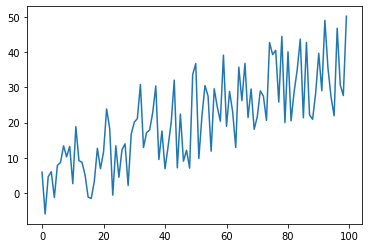

In [30]:
plt.plot(x, y)

In [31]:
x1 = np.arange(2*N)
x2 = np.arange(N, 5*N, 2)
x = np.dstack((x1, x2))[0]

In [32]:
x[:3]

array([[  0, 100],
       [  1, 102],
       [  2, 104]])

In [33]:
delta = np.random.uniform(-15, 15, size=(N,))
y = np.dot(x, np.array([3, 7])) + 3

In [35]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x, y)
print(f"Score: {reg.score(x, y)}\tCoefficients: {reg.coef_}\tInterpect: {reg.intercept_}")


Score: 1.0	Coefficients: [3.4 6.8]	Interpect: 23.0


In [27]:
?LinearRegression

In [8]:
reg.predict(np.array([[3, 5]]))

array([67.2])

In [13]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
diabetes = datasets.load_diabetes()

# Get one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes['target'], test_size=0.33, random_state=42)

In [53]:
diabetes.data.shape

(442, 10)

In [40]:
diab_model = LinearRegression()
diab_model.fit(X_train, y_train)

y_pred = diab_model.predict(X_test)

In [36]:
X_train[:10]

array([[-0.03099563],
       [ 0.05415152],
       [-0.00512814],
       [-0.00943939],
       [ 0.0250506 ],
       [ 0.12852056],
       [ 0.01427248],
       [-0.00081689],
       [-0.03099563],
       [ 0.00457217]])

In [ ]:
def loss_function(X_train, y_train, a, b, c):
    N = X_train.shape[0]
    

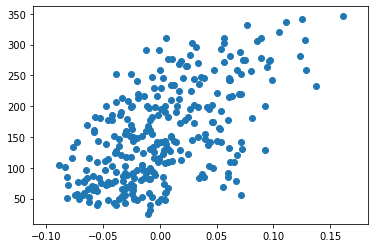

In [45]:
plt.scatter(X_train, y_train)